In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import string

%matplotlib inline
pd.options.display.max_seq_items = 1000
pd.options.display.max_colwidth = 200

In [28]:
train = pd.read_csv("train.csv").fillna("")
train.head() 

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in share market in india?,What is the step by step guide to invest in share market?,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Diamond?,What would happen if the Indian government stole the Kohinoor (Koh-i-Noor) diamond back?,0
2,2,5,6,How can I increase the speed of my internet connection while using a VPN?,How can Internet speed be increased by hacking through DNS?,0
3,3,7,8,Why am I mentally very lonely? How can I solve it?,"Find the remainder when [math]23^{24}[/math] is divided by 24,23?",0
4,4,9,10,"Which one dissolve in water quikly sugar, salt, methane and carbon di oxide?",Which fish would survive in salt water?,0


In [29]:
train.isnull().any()

id              False
qid1            False
qid2            False
question1       False
question2       False
is_duplicate    False
dtype: bool

In [30]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
id              404290 non-null int64
qid1            404290 non-null int64
qid2            404290 non-null int64
question1       404290 non-null object
question2       404290 non-null object
is_duplicate    404290 non-null int64
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [31]:
train.describe()

,id,qid1,qid2,is_duplicate
count,404290.000000,404290.000000,404290.000000,404290.000000
mean,202144.500000,217243.942418,220955.655337,0.369198
std,116708.614502,157751.700002,159903.182629,0.482588
min,0.000000,1.000000,2.000000,0.000000
25%,101072.250000,74437.500000,74727.000000,0.000000
50%,202144.500000,192182.000000,197052.000000,0.000000
75%,303216.750000,346573.500000,354692.500000,1.000000
max,404289.000000,537932.000000,537933.000000,1.000000


In [32]:
foo = train.groupby(['qid1']).size().reset_index().rename(columns={0:'count'})
foo.ix[foo["count"] > 1].head()

,qid1,count
1,3,4
5,9,3
15,27,2
16,29,5
17,31,7


In [33]:
train.ix[(train["qid1"] == 31) | (train["qid2"] == 31)]

,id,qid1,qid2,question1,question2,is_duplicate
15,15,31,32,What would a Trump presidency mean for current international master’s students on an F1 visa?,How will a Trump presidency affect the students presently in US or planning to study in US?,1
160090,160090,31,6937,What would a Trump presidency mean for current international master’s students on an F1 visa?,How will Trump’s presidency affect international students in the US?,1
215442,215442,31,88834,What would a Trump presidency mean for current international master’s students on an F1 visa?,How would a Trump presidency affect schools accessibility for international students?,1
218075,218075,31,1101,What would a Trump presidency mean for current international master’s students on an F1 visa?,How would Trump presidency affect Indian students in the US?,1
238721,238721,31,11435,What would a Trump presidency mean for current international master’s students on an F1 visa?,What will happen to international students in the US if Donald Trump becomes president?,1
238955,238955,31,93145,What would a Trump presidency mean for current international master’s students on an F1 visa?,Will the Trump factor affect the admission of international students in the USA?,1
290679,290679,249733,31,Will international college students be negatively affected if Trump becomes president?,What would a Trump presidency mean for current international master’s students on an F1 visa?,1
344612,344612,44686,31,What does a Trump presidency mean for Indian students looking to pursue Master's degrees in USA?,What would a Trump presidency mean for current international master’s students on an F1 visa?,1
364513,364513,31,12544,What would a Trump presidency mean for current international master’s students on an F1 visa?,How will Trump's presidency affect prospective international students from Syria?,1


In [34]:
foo = train.groupby("is_duplicate", as_index=False)['id'].count()
foo = foo.rename(columns = {list(foo)[1]: 'count'})
print(foo)

   is_duplicate   count
0             0  255027
1             1  149263


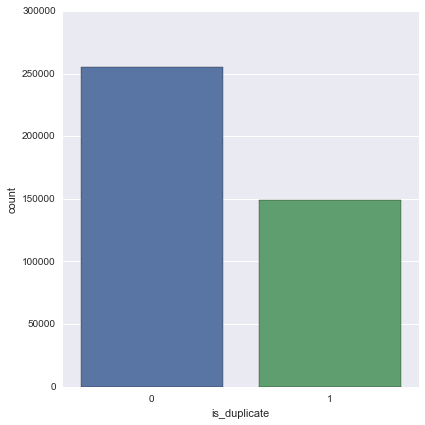

In [ ]:
g = sns.factorplot(x="is_duplicate", y="count",  data=foo, kind="bar", size=6)

In [ ]:
def normalized_word_share(row):
    w1 = set(map(lambda word: word, row['question1_cleaned'].split(" ")))
    w2 = set(map(lambda word: word, row['question2_cleaned'].split(" ")))    
    return 1.0 * len(w1 & w2)/(len(w1 | w2))

def clean_question(q, translator):
    q = q.lower().strip().translate(translator)
    return q

translator = str.maketrans('', '', string.punctuation)
train['question1_cleaned'] = train['question1'].apply(clean_question, args=(translator,))
train['question2_cleaned'] = train['question2'].apply(clean_question, args=(translator,))

train['word_share'] = train.apply(normalized_word_share, axis=1)

train.head()


In [ ]:
train.loc[(train['word_share']==1) & (train['is_duplicate'] == 0), ["id", "question1", "question2"]]

In [ ]:
train.loc[train["id"] == 36796]

In [ ]:
plt.figure(figsize=(12, 8))
sns.distplot(train.ix[train['is_duplicate'] == 1, 'word_share'], color = 'green', label="duplicate")
sns.distplot(train.ix[train['is_duplicate'] == 0, 'word_share'], color = 'red', label="not duplicate")
plt.legend()